# Linear Regression

## Agenda

1. Introducing the bikeshare dataset
    - Reading in the data
    - Visualizing the data
2. Linear regression basics
    - Form of linear regression
    - Building a linear regression model
    - Using the model for prediction
    - Does the scale of the features matter?
3. Working with multiple features
    - Visualizing the data (part 2)
    - Adding more features to the model
4. Choosing between models
    - Feature selection
    - Evaluation metrics for regression problems
    - Comparing models with train/test split and RMSE
    - Comparing testing RMSE with null RMSE
5. Creating features
    - Handling categorical features
    - Feature engineering
6. Comparing linear regression with other models

## Read in Bike Share Data

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
bikes = pd.read_csv('2016-Q1-Trips-History-Data.csv.gz')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'])
%time bikes['end'] = pd.to_datetime(bikes['End date'])

CPU times: user 7.14 s, sys: 10.8 ms, total: 7.15 s
Wall time: 7.15 s


In [6]:
bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00


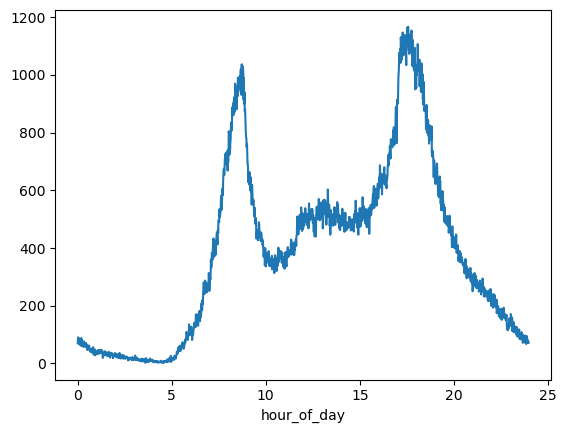

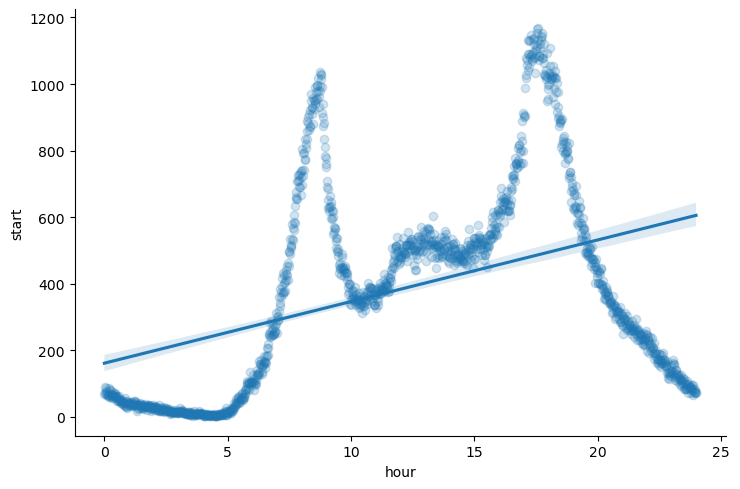

In [7]:
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute/60).round(2))

hours = bikes.groupby('hour_of_day').agg('count')
hours['hour'] = hours.index

hours.start.plot()
# import seaborn as sns

sns.lmplot(x='hour', y='start', data=hours, aspect=1.5, scatter_kws={'alpha':0.2})

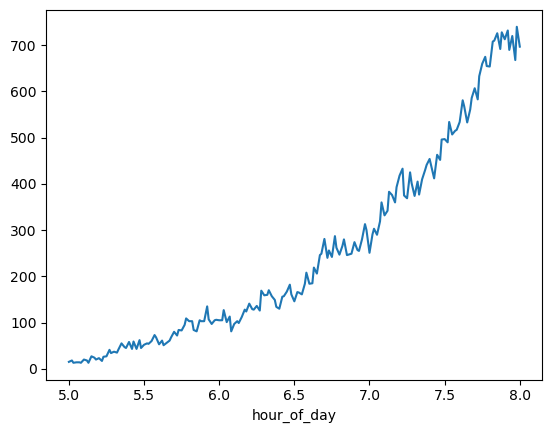

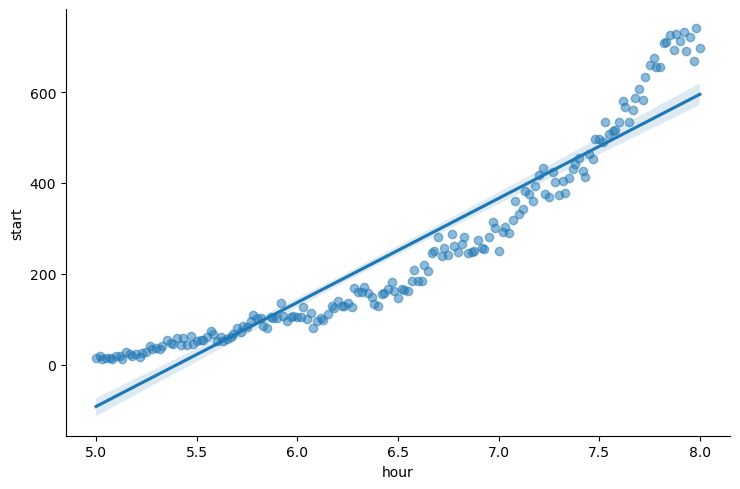

In [8]:
hours[5:8].start.plot()
# import seaborn as sns

sns.lmplot(x='hour', y='start', data=hours[5:8], aspect=1.5, scatter_kws={'alpha':0.5})

## Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

The $\beta$ values are called the **model coefficients**:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").
- And once we've learned these coefficients, we can use the model to predict the response.

![Estimating coefficients](images/estimating_coefficients.png)

In the diagram above:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the vertical distances between the observed values and the least squares line.

## Building a linear regression model

## scikit-learn's 4-step modeling pattern

In [19]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['al']
X = hours[['hour']]
y = hours.start
linreg.fit(X, y)

/Users/mahmoud/.virtualenvs/eventx/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

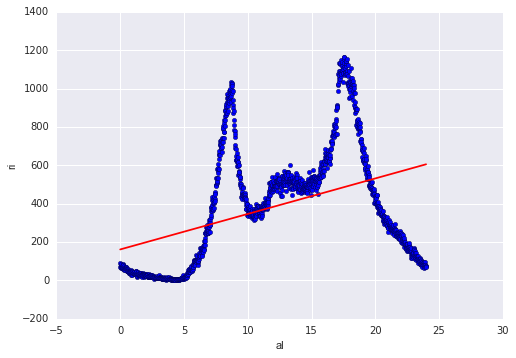

In [23]:
hours['pred'] = linreg.predict(X)

# put the plots together
plt.scatter(hours.hour, hours.start)
plt.plot(hours.hour, hours.pred, color='red')
plt.xlabel('hours')
plt.ylabel('count')

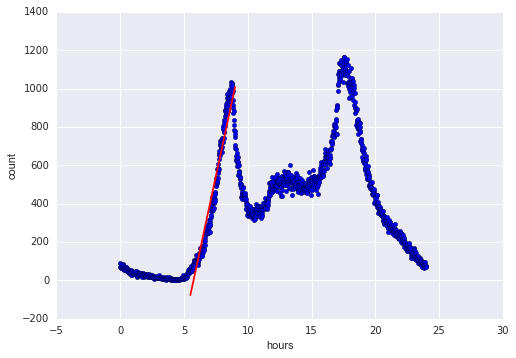

In [41]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
linreg = None
linreg = LinearRegression()

partial_hours = hours.loc[5.5:9]

X = partial_hours[['hour']]
y = partial_hours.start
linreg.fit(X, y)

hours.loc[5.5:9, 'pred'] = linreg.predict(partial_hours[['hour']])

# put the plots together
plt.scatter(hours.hour, hours.start)
plt.plot(partial_hours.hour, partial_hours.pred, color='red')
plt.xlabel('hours')
plt.ylabel('count')

**Step 1:** Import the class you plan to use

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for "model"
- "Instantiate" means "make an instance of"

- Created an object that "knows" how to do Linear Regression, and is just waiting for data
- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

**Step 3:** Fit the model with data (aka "model training")

- Model is "learning" the relationship between X and y in our "training data"
- Process through which learning occurs varies by model
- Occurs in-place

- Once a model has been fit with data, it's called a "fitted model"

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

Interpreting the **intercept** ($\beta_0$):

- It is the value of $y$ when $x$=0.
- Thus, it is the estimated number of rentals when the temperature is 0 degrees Celsius.
- **Note:** It does not always make sense to interpret the intercept. (Why?)

Interpreting the **"temp" coefficient** ($\beta_1$):

- It is the change in $y$ divided by change in $x$, or the "slope".
- Thus, a temperature increase of 1 degree Celsius is **associated with** a rental increase of 9.17 bikes.
- This is not a statement of causation.
- $\beta_1$ would be **negative** if an increase in temperature was associated with a **decrease** in rentals.